In [1]:
import numpy as np
from scipy.stats import bernoulli
np.set_printoptions(precision=3)

In [196]:
import numpy as np
from scipy.stats import bernoulli

def generate_data(size, tau):
    x = np.sort(np.random.uniform(-1, 1, size))
    y = np.zeros(size).astype(int)
    y[x > 0] = 1
    y[x <= 0] = -1
    
    noisy_idx = bernoulli.rvs(tau, size=size) > 0
    y[noisy_idx] = -y[noisy_idx]
    
    return x, y

def get_g_Ein(x, y):
    theta_set = ([-1] + list(((x[1:] + x[:-1]) / 2))) * 2
    s_set = [-1] * len(x) + [1] * len(x)
    hypothesis_set = np.array(sorted(tuple(zip(s_set, theta_set)), key=lambda x: x[0] + x[1]))
    g, Ein = (-1, -1), 1
    
    for hypothesis in hypothesis_set:
        err = get_err(hypothesis, x, y)
        if Ein > err:
            g, Ein = hypothesis, err
        if Ein == 0:
            break
    return g, Ein

def get_err(hypothesis, x, y):
    s, theta = hypothesis
    pred = np.ones(len(y)).astype(int)
        
    if s > 0:
        pred[x <= theta] = -1
    else:
        pred[x > theta] = -1
    
    return (y != pred).sum() / len(y)

def get_Eout(hypothesis, tau, IsSimulate=False):
    if IsSimulate:
        x_tst, y_tst = generate_data(100000, tau)
        Eout = get_err(hypothesis, x_tst, y_tst)
        return Eout
    else:
        s, theta = hypothesis
        Eout = 0.5 * np.abs(theta) if s > 0 else 1 - 0.5 * np.abs(theta)
        return (1 - 2 * tau) * Eout + tau

def get_answer(exp_num, size, tau, IsSimulate=False):
    ans = []
    
    for _ in range(exp_num):
        random.seed(random.randint(1, 10000))
        x_tra, y_tra = generate_data(size, tau)
        
        g, Ein = get_g_Ein(x_tra, y_tra)
        Eout = get_Eout(g, tau, IsSimulate)
        ans.append(Eout - Ein)
        
    return np.mean(ans)

def run(size, tau):
    diff_result = []
    Ein = []
    for exp_idx in range(10000):
        random.seed(random.randint(1, 10000))
        data_x, data_y = data_generator(size, tau)
        deci_stump = Decision_Stump(tau , random_seed=exp_idx)
        min_ein , param = deci_stump.train(data_x, data_y)
        (theta, _) = param
#         eout_tau = abs(theta)/2 + tau - tau*abs(theta)
        eout_tau = get_Eout((_, theta), tau)
        Ein.append(min_ein)
        diff_result.append(eout_tau - min_ein)
    print(np.mean(diff_result))

In [202]:
print(get_answer(exp_num=10000, size=2, tau=0, IsSimulate=True))
print(get_answer(exp_num=10000, size=20, tau=0, IsSimulate=True))
print(get_answer(exp_num=10000, size=2, tau=0.1, IsSimulate=True))
print(get_answer(exp_num=10000, size=20, tau=0.1, IsSimulate=True))
print(get_answer(exp_num=10000, size=200, tau=0.1, IsSimulate=True))

0.29238488400000007
0.023803214
0.366825371
0.051540724999999996
0.005653884999999998


In [203]:
print(get_answer(exp_num=10000, size=2, tau=0, IsSimulate=True))
print(get_answer(exp_num=10000, size=20, tau=0, IsSimulate=True))
print(get_answer(exp_num=10000, size=2, tau=0.1, IsSimulate=True))
print(get_answer(exp_num=10000, size=20, tau=0.1, IsSimulate=True))
print(get_answer(exp_num=10000, size=200, tau=0.1, IsSimulate=True))

0.290719858
0.023999138999999996
0.367527087
0.050476233
0.0050245479999999985


In [201]:
print(get_answer(exp_num=10000, size=2, tau=0))
print(get_answer(exp_num=10000, size=20, tau=0))
print(get_answer(exp_num=10000, size=2, tau=0.1))
print(get_answer(exp_num=10000, size=20, tau=0.1))
print(get_answer(exp_num=10000, size=200, tau=0.1))

0.2928606328985101
0.023638587826711775
0.3681077809516546
0.05115065328957497
0.005227051999597672


In [200]:
print(get_answer(exp_num=10000, size=2, tau=0))
print(get_answer(exp_num=10000, size=20, tau=0))
print(get_answer(exp_num=10000, size=2, tau=0.1))
print(get_answer(exp_num=10000, size=20, tau=0.1))
print(get_answer(exp_num=10000, size=200, tau=0.1))

0.29629398112897787
0.02415595889316911
0.3690307662057251
0.04918341730656399
0.005787727180248098


In [198]:
print(get_answer(exp_num=10000, size=2, tau=0))
print(get_answer(exp_num=10000, size=20, tau=0))
print(get_answer(exp_num=10000, size=2, tau=0.1))
print(get_answer(exp_num=10000, size=20, tau=0.1))
print(get_answer(exp_num=10000, size=200, tau=0.1))

0.2910996395596953
0.023660954310651704
0.3688761108279201
0.05052775889235215
0.00514628497215039


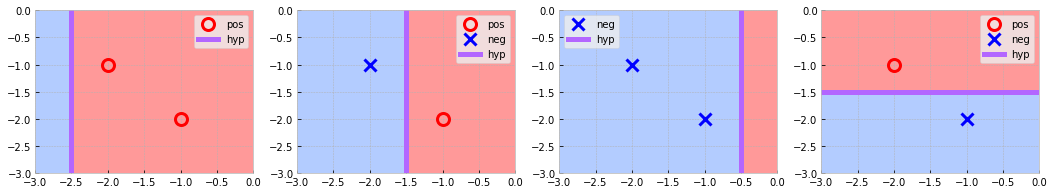

In [30]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')
fig, ax = plt.subplots(1, 4, figsize=(18,3))
# fig.suptitle("positively-biased perceptrons in 2D")

x = np.array([-1, -2])
y = np.array([-2, -1])
ax[0].plot(x, y, '.', mew=3, markersize=12, marker = "o", color = 'red', label='pos', mfc='none')
color = [1, 0.6, 0.6]
ax[0].add_patch(plt.Polygon((np.array([0, 0]), np.array([-2.5, 0]), np.array([-2.5, -3]), np.array([0, -3])), facecolor=color, edgecolor=color))
color = [0.7, 0.8, 1]
ax[0].add_patch(plt.Polygon((np.array([-2.5, 0]), np.array([-3, 0]), np.array([-3, -3]), np.array([-2.5, -3])), facecolor=color, edgecolor=color))
color = [0.7, 0.4, 1]
ax[0].plot(np.array([-2.5, -2.5]), np.array([0, -3]), linewidth=5, label='hyp', color = color)
ax[0].set_xlim(-3, 0)
ax[0].set_ylim(-3, 0)
ax[0].legend()

ax[1].plot(x[0], y[0], '.', mew=3, markersize=12, marker = "o", label='pos', mfc='none', color = 'red')
ax[1].plot(x[1], y[1], '.', mew=3, markersize=12, marker = "x", label='neg', color='blue')
color = [1, 0.6, 0.6]
ax[1].add_patch(plt.Polygon((np.array([0, 0]), np.array([-1.5, 0]), np.array([-1.5, -3]), np.array([0, -3])), facecolor=color, edgecolor=color))
color = [0.7, 0.8, 1]
ax[1].add_patch(plt.Polygon((np.array([-1.5, 0]), np.array([-3, 0]), np.array([-3, -3]), np.array([-1.5, -3])), facecolor=color, edgecolor=color))
color = [0.7, 0.4, 1]
ax[1].plot(np.array([-1.5, -1.5]), np.array([0, -3]), linewidth=5, label='hyp', color = color)
ax[1].set_xlim(-3, 0)
ax[1].set_ylim(-3, 0)
ax[1].legend()

ax[2].plot(x, y, '.', mew=3, markersize=12, marker = "x", color = 'blue', label='neg')
color = [1, 0.6, 0.6]
ax[2].add_patch(plt.Polygon((np.array([0, 0]), np.array([-0.5, 0]), np.array([-0.5, -3]), np.array([0, -3])), facecolor=color, edgecolor=color))
color = [0.7, 0.8, 1]
ax[2].add_patch(plt.Polygon((np.array([-0.5, 0]), np.array([-3, 0]), np.array([-3, -3]), np.array([-0.5, -3])), facecolor=color, edgecolor=color))
color = [0.7, 0.4, 1]
ax[2].plot(np.array([-0.5, -0.5]), np.array([0, -3]), linewidth=5, label='hyp', color = color)
ax[2].set_xlim(-3, 0)
ax[2].set_ylim(-3, 0)
ax[2].legend()

ax[3].plot(x[1], y[1], '.', mew=3, markersize=12, marker = "o", label='pos', mfc='none', color = 'red')
ax[3].plot(x[0], y[0], '.', mew=3, markersize=12, marker = "x", label='neg', color='blue')
color = [1, 0.6, 0.6]
ax[3].add_patch(plt.Polygon((np.array([0, 0]), np.array([-3, 0]), np.array([-3, -1.5]), np.array([0, -1.5])), facecolor=color, edgecolor=color))
color = [0.7, 0.8, 1]
ax[3].add_patch(plt.Polygon((np.array([-3, -3]), np.array([0, -3]), np.array([0, -1.5]), np.array([-3, -1.5])), facecolor=color, edgecolor=color))
color = [0.7, 0.4, 1]
ax[3].plot(np.array([0, -3]), np.array([-1.5, -1.5]), linewidth=5, label='hyp', color = color)
ax[3].set_xlim(-3, 0)
ax[3].set_ylim(-3, 0)
ax[3].legend()

plt.show()

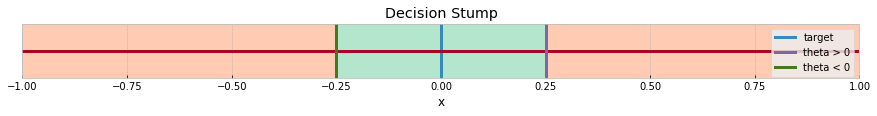

In [156]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('bmh')
fig, ax = plt.subplots(figsize=(15,1))
x = 0.25
y = -1
size = 2
color = [1, 0.8, 0.7]
rect = plt.Rectangle([x, y], size, size,
                                 facecolor=color, edgecolor=color)
ax.add_patch(rect)

x = -1
y = -1
size = 2
color = [1, 0.8, 0.7]
rect = plt.Rectangle([x, y], 0.75, size,
                                 facecolor=color, edgecolor=color)
ax.add_patch(rect)

x = 0
y = -1
size = 2
color = [0.7, 0.9, 0.8]
rect = plt.Rectangle([x, y], 0.25, size,
                                 facecolor=color, edgecolor=color)
ax.add_patch(rect)

x = -0.25
y = -1
size = 2
color = [0.7, 0.9, 0.8]
rect = plt.Rectangle([x, y], 0.25, size,
                                 facecolor=color, edgecolor=color)
ax.add_patch(rect)

# x = -0.25
# y = -1
# size = 2
# color = [0.7, 0.9, 0.8]
# rect = plt.Rectangle([x, y], 0.25, size,
#                                  facecolor=color, edgecolor=color)
# ax.add_patch(rect)


x = -1
y = -1

plt.plot(np.array([0, 0]), np.array([-1, 1]), linewidth=3, label='target')
plt.plot(np.array([-1, 1]), np.array([0, 0]), linewidth=3)
plt.plot(np.array([0.25, 0.25]), np.array([-1, 1]), linewidth=3, label='theta > 0')
plt.plot(np.array([-0.25, -0.25]), np.array([-1, 1]), linewidth=3, label='theta < 0')

plt.xlim(-1, 1)
plt.ylim(-0.5, 0.5)
plt.title("Decision Stump")
plt.xlabel("x")
ax.get_yaxis().set_visible(False)
ax.legend()
plt.show() 

In [54]:
bernoulli.rvs(0.1, size=1000).shape

(1000,)

In [90]:
import numpy as np
import argparse
import random
def sign(x):
    return -1. if x <= 0 else 1.

class Decision_Stump(object):
    def __init__(self, tau, random_seed):
        random.seed(random_seed + random.randint(1, 10000))
        self.tau = tau
        self.theta_ls = [-1.]
        self.log = {} # ein : (theta , s)
        self.smallest_ein = float('inf')

    def f(self, x, s, theta):
        return s * sign(x-theta)

    def train(self, data_x, data_y):
        data_size = len(data_x)
        assert len(data_x) == len(data_y)
        
        # build theta list
        for idx in range(data_size -1):
            self.theta_ls.append((data_x[idx]+data_x[idx+1])/2)
            
        ein_now = None
        correct = 0
        for theta_idx , theta in enumerate(self.theta_ls):
            if ein_now is None:
                for idx in range(data_size):
                    if self.f(data_x[idx], 1., theta) == data_y[idx]:
                        correct += 1
            else:
                if self.f(data_x[theta_idx -1], 1., theta) == data_y[theta_idx -1]:
                    correct += 1
                else:
                    correct -= 1
            ein_now = 1 - correct/data_size
            self.log[ein_now] = (theta, 1.)
            self.smallest_ein = ein_now if ein_now < self.smallest_ein else self.smallest_ein
            self.log[1-ein_now] = (theta, -1.)
            self.smallest_ein = 1-ein_now if 1-ein_now < self.smallest_ein else self.smallest_ein
        return self.smallest_ein , self.log[self.smallest_ein]
    
def data_generator(size, tau):
    data_x = sorted([random.uniform(-1, 1) for _ in range(size)])
    data_y = [sign(x) for x in data_x]

    # add randomness with tau
    if tau != 0.:
        for y_idx in range(len(data_y)):
            if random.uniform(0, 1) < tau:
                data_y[y_idx] = -data_y[y_idx]
    return data_x, data_y
   

In [101]:
run(size=2, tau=0)
run(size=20, tau=0)
run(size=2, tau=0.1)
run(size=20, tau=0.1)
run(size=200, tau=0.1)

0.29245198725340404
0.023671864358001605
0.3454056656224419
0.05238717655324691
0.005525820402845514


In [119]:
size = 2
tau=0.1
temp = []
temp2 = []
for exp_idx in range(1000):
    data_x, data_y = data_generator(size, tau)
    A = np.array(data_x) > 0
    B = np.array(data_y) > 0
    temp.append((A!=B).sum()/len(data_y))
    
    x, y = generate_data(size, tau)
    A = x > 0
    B = y > 0
    temp2.append((A!=B).sum()/len(data_y))
    
print(np.mean(temp), np.mean(temp2))

0.0935 0.0935


In [129]:
size = 2
tau=0.1
temp = []
temp2 = []
for exp_idx in range(1000):
    data_x, data_y = data_generator(size, tau)
    A = np.array(data_x) > 0
    B = np.array(data_y) > 0
    temp.append((A!=B).sum()/len(data_y))
    
    x, y = generate_data(size, tau)
    A = x > 0
    B = y > 0
    temp2.append((A!=B).sum()/len(data_y))
    
print(np.mean(temp), np.mean(temp2))

0.094 0.0955
